In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("selected_features.csv")
data

Have you ever had suicidal thoughts ?  Academic Pressure  \
0                                          1                1.0   
1                                          0                0.4   
2                                          0                0.6   
3                                          1                0.6   
4                                          1                0.8   
...                                      ...                ...   
27893                                      1                1.0   
27894                                      0                0.4   
27895                                      0                0.6   
27896                                      1                1.0   
27897                                      1                0.8   

       Financial Stress  Work/Study Hours  Dietary Habits       Age  \
0                  0.00          0.250000        0.666667  0.588235   
1                  0.25          0.250000        0.333333  0.235294   
2                  0.00          0.750000        0.666667  0.509804   
3                  1.00          0.333333        0.333333  0.392157   
4                  0.00          0.083333        0.333333  0.274510   
...                 ...               ...             ...       ...   
27893              0.00          0.583333        0.000000  0.352941   
27894              0.50          0.000000        0.666667  0.352941   
27895              0.25          1.000000        0.000000  0.509804   
27896              1.00          0.833333        0.666667  0.000000   
27897              0.50          0.166667        0.666667  0.352941   

       Depression  
0             1.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
...           ...  
27893         0.0  
27894         0.0  
27895         0.0  
27896         1.0  
27897         1.0  

[27898 rows x 7 columns]

<Axes: xlabel='Depression'>

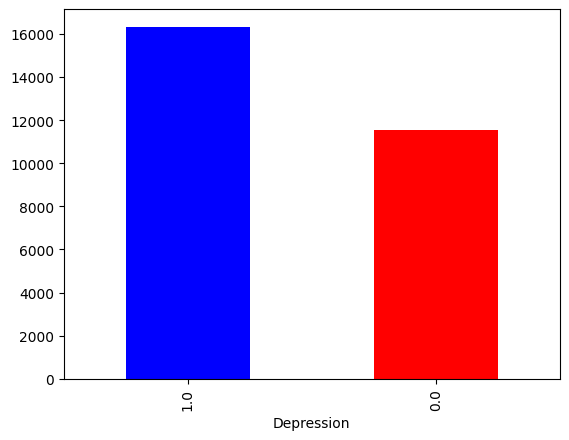

In [3]:
data['Depression'].value_counts().plot(kind='bar',color=['blue','red'])

In [4]:
X = data.drop(columns=['Depression'])
y = data['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


NameError: name 'SMOTE' is not defined

In [ ]:
y_train_smote_series = pd.Series(y_train_smote)
y_train_smote_series.value_counts().plot(kind='bar', color=['blue', 'red'])

plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

In [ ]:
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

RF_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid_search.best_params_)
best_RF_model = grid_search.best_estimator_

ytest_pred = best_RF_model.predict(X_test)
testaccuracy = accuracy_score(y_test, ytest_pred)
print(f"Test Accuracy: {testaccuracy:.2f}")

ytrain_pred = best_RF_model.predict(X_train_smote)
trainaccuracy = accuracy_score(y_train_smote, ytrain_pred)
print(f"Training Accuracy: {trainaccuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
'''

In [ ]:
best_rf = RandomForestClassifier(
    max_depth=10, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=10, 
    n_estimators=200, 
    random_state=42
)

best_rf.fit(X_train_smote, y_train_smote)


In [ ]:
ytest_pred = best_rf.predict(X_test)
testaccuracy = accuracy_score(y_test, ytest_pred)
print(f"Test Accuracy: {testaccuracy:.2f}")

ytrain_pred = best_rf.predict(X_train_smote)
trainaccuracy = accuracy_score(y_train_smote, ytrain_pred)
print(f"Training Accuracy: {trainaccuracy:.2f}")


In [ ]:
print("\n Test Classification Report:\n", classification_report(y_test, ytest_pred))


In [ ]:
print("\n Train Classification Report:\n", classification_report(y_train_smote,ytrain_pred))
